In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = False))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.845679012345679, Loss: 0.6510740209508825
Checkpoint 200, Accuracy: 0.8395061728395061, Loss: 0.6533800760904948
Checkpoint 300, Accuracy: 0.8395061728395061, Loss: 0.6498977519847728
Checkpoint 400, Accuracy: 0.8395061728395061, Loss: 0.6546687373408565


C:\Users\AI-lab\github_repo\neural-network\python\layer.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.sum(w * X) + b


Checkpoint 500, Accuracy: 0.8395061728395061, Loss: 0.6424597987422237


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.89043015]
 [0.07572966]
 [0.03384019]]
[1. 0. 0.] <-> [[0.91377956]
 [0.05815642]
 [0.02806404]]
[1. 0. 0.] <-> [[0.92702353]
 [0.0470178 ]
 [0.02595866]]
[0. 0. 1.] <-> [[0.80935204]
 [0.12749138]
 [0.06315652]]
[0. 0. 1.] <-> [[0.74043816]
 [0.16803512]
 [0.09152674]]
[1. 0. 0.] <-> [[0.4430576 ]
 [0.33224592]
 [0.2246965 ]]
[1. 0. 0.] <-> [[0.5777095 ]
 [0.26022106]
 [0.16206935]]
[1. 0. 0.] <-> [[0.8789276 ]
 [0.08361561]
 [0.0374568 ]]
[0. 1. 0.] <-> [[0.5101964 ]
 [0.29717353]
 [0.19263004]]
[1. 0. 0.] <-> [[0.82717913]
 [0.11663616]
 [0.05618478]]
[1. 0. 0.] <-> [[0.90626   ]
 [0.06411577]
 [0.02962431]]
[1. 0. 0.] <-> [[0.6603646 ]
 [0.2136766 ]
 [0.12595882]]
[1. 0. 0.] <-> [[0.67103547]
 [0.20762938]
 [0.12133521]]
[1. 0. 0.] <-> [[0.837168  ]
 [0.11046197]
 [0.05237012]]
[1. 0. 0.] <-> [[0.8848984 ]
 [0.07956441]
 [0.03553715]]
[1. 0. 0.] <-> [[0.89031327]
 [0.07581163]
 [0.03387511]]
[1. 0. 0.] <-> [[0.75177497]
 [0.16148287]
 [0.08674213]]
[1. 0. 0.] <->

In [12]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

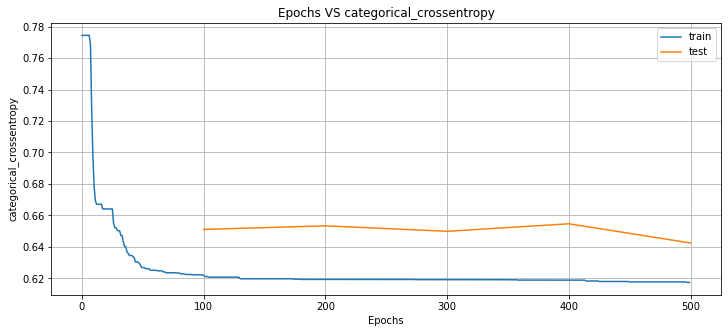

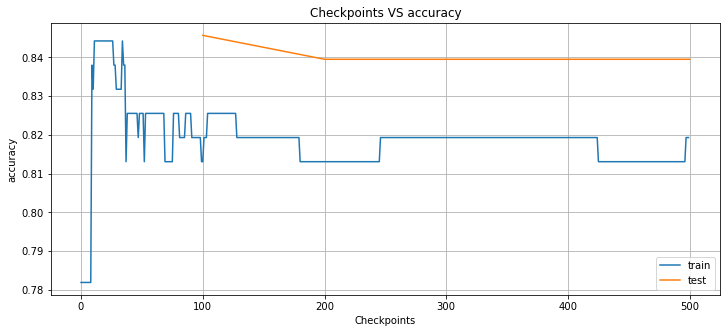

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.845679012345679, 'mean_square_error': 2.9655756803541244, 'categorical_crossentropy': 0.6510740209508825, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 19, 'tn_hit': 11, 'fn_hit': 2}, 1: {'tp_hit': 4, 'fp_hit': 3, 'tn_hit': 89, 'fn_hit': 12}, 2: {'tp_hit': 3, 'fp_hit': 3, 'tn_hit': 91, 'fn_hit': 11}}, 'checkpoint': 100} 


{'accuracy': 0.8395061728395061, 'mean_square_error': 2.9965717113751498, 'categorical_crossentropy': 0.6533800760904948, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 23, 'tn_hit': 7, 'fn_hit': 0}, 1: {'tp_hit': 1, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 15}, 2: {'tp_hit': 3, 'fp_hit': 3, 'tn_hit': 91, 'fn_hit': 11}}, 'checkpoint': 200} 


{'accuracy': 0.8395061728395061, 'mean_square_error': 2.949556223596188, 'categorical_crossentropy': 0.6498977519847728, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 23, 'tn_hit': 7, 'fn_hit': 0}, 1: {'tp_hit': 1, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 15}, 2: {'tp_hit': 3, 'fp_hit': 3, 'tn_hit': 91, 'fn_hit

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[[-1.3351043 ]
 [-1.1312205 ]
 [-1.7620486 ]
 [ 0.10949879]
 [ 0.65469724]]
 bias: [-0.99675477]

Neuron 1: weights:
[[-0.98342824]
 [ 0.732261  ]
 [-0.8395512 ]
 [ 1.1388937 ]
 [ 0.5455817 ]]
 bias: [-2.112321]

Neuron 2: weights:
[[-0.08958095]
 [ 1.9384183 ]
 [ 0.6937466 ]
 [-0.8830773 ]
 [-0.39282057]]
 bias: [-3.]

Neuron 3: weights:
[[ 1.9703225]
 [-1.3443509]
 [ 1.5901853]
 [-1.6301608]
 [-1.026147 ]]
 bias: [-0.81252897]

$
Layer 2
Neuron 0: weights:
[[-0.3109454 ]
 [-1.5461463 ]
 [-3.        ]
 [ 0.30087757]]
 bias: [1.0003943]

Neuron 1: weights:
[[-1.2173136 ]
 [-0.12430843]
 [ 1.0769851 ]
 [-1.8197882 ]]
 bias: [0.11186814]

Neuron 2: weights:
[[-1.6499829 ]
 [ 2.3383582 ]
 [ 1.5630151 ]
 [ 0.17078012]]
 bias: [-1.2684277]

$

